In [1]:
import sys
import os

import xml.etree.ElementTree as ET
from treelib import Node, Tree

from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

In [2]:
from bowtie.dataresources.opsa import OPSA_Container, OPSA_Gate, OPSA_Basic_Event, OPSA_Path, OPSA_Functional_Event
from bowtie.dataresources.type_definitions import EventType, GateType
from bowtie.io.import_opsa import OPSA_Importer

from bowtie.mapping.mapping_bowtie import MappingBowTie

# Import a bow tie

In [3]:
# define opsa file
filename = '../data/test_et_v03_works.xml'
filename = '../data/test_et_v03_true.xml'
filename = '../data/khakzad_dynamic_v03.xml'
filename = '../data/Zarei_regulator_system_v01.xml'

In [4]:
# read file
xml_root = ET.parse(filename).getroot()
tree = Tree()
tree_root = tree.create_node('root')
importer = OPSA_Importer()
importer.parse(xml_root, tree, tree_root)

In [5]:
# show imported data
tree.show()

root
├── RSF
│   └── EventTree
│       └── ESDa
│           ├── Path.ESDa.fails
│           │   └── II
│           │       ├── Path.II.fails
│           │       │   └── ESDm
│           │       │       ├── Path.ESDm.fails
│           │       │       │   └── C9
│           │       │       └── Path.ESDm.works
│           │       │           └── C8
│           │       └── Path.II.works
│           │           └── ESDm
│           │               ├── Path.ESDm.fails
│           │               │   └── DI
│           │               │       ├── Path.DI.fails
│           │               │       │   └── Cong
│           │               │       │       ├── Path.Cong.fails
│           │               │       │       │   └── C7
│           │               │       │       └── Path.Cong.works
│           │               │       │           └── C6
│           │               │       └── Path.DI.works
│           │               │           └── C5
│           │               └── Path.ESDm.works
│   

# Map data

In [6]:
mapper = MappingBowTie(tree)
model = mapper.map()

mapping from Bow-Tie to Bayesian network


In [7]:
model.check_model()

True

In [8]:
# show model nodes
print('nodes')
print(model.nodes())

nodes
['X9', 'X10', 'X11', 'X12', 'X5', 'X6', 'X7', 'X8', 'X1', 'X2', 'X3', 'X4', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X25', 'X26', 'X27', 'X28', 'X29', 'X20', 'X21', 'X22', 'X23', 'X24', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'RSF', 'IE1', 'IE5', 'IE9', 'IE2', 'IE3', 'IE4', 'IE6', 'IE8', 'IE7', 'IE10', 'IE11', 'IE14', 'IE15', 'IE12', 'IE13', 'IE16', 'IE18', 'IE17', 'ESDa', 'Consequence', 'II', 'ESDm', 'DI', 'Cong']


/Users/frankz/.local/share/virtualenvs/clean_up-5BTXHGOZ/lib/python3.7/site-packages/networkx/drawing/layout.py:950: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


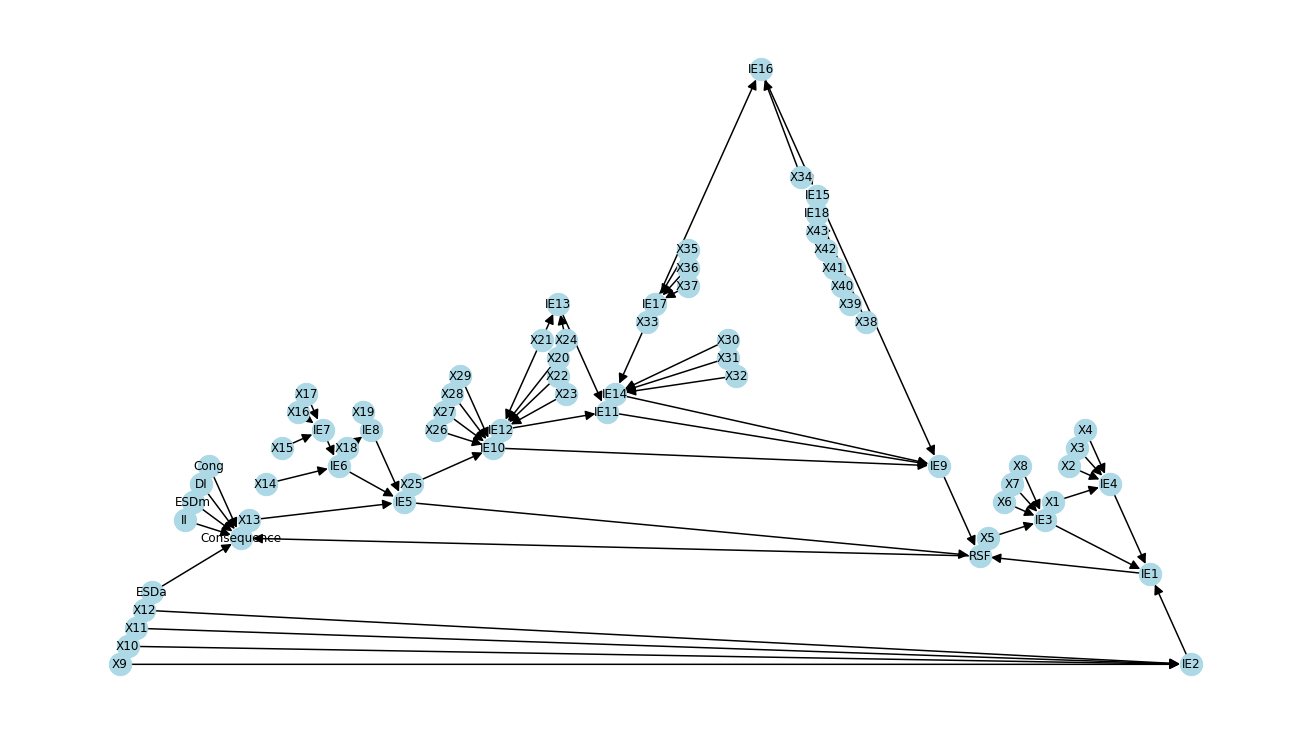

In [10]:
import networkx as nx
#import pylab as plt

import matplotlib.pyplot as plt

options = {
    'with_labels': True,
    'arrowsize': 20,
    'node_color': 'lightblue',
    'node_size': 500,
    'font_size': 12,
    'line_widths': 2.0,
    'width': 1.5,
    'node_shape': 'o',
}
plt.figure(3,figsize=(18,10)) 

nx.draw_planar(model, **options)
plt.show()

In [11]:
# print CPD tables of bayesian network
for cpd in model.cpds:
    print(cpd)

+-----------+-------+
| X9(works) | 0.993 |
+-----------+-------+
| X9(fails) | 0.007 |
+-----------+-------+
+------------+-------+
| X10(works) | 0.993 |
+------------+-------+
| X10(fails) | 0.007 |
+------------+-------+
+------------+-------+
| X11(works) | 0.992 |
+------------+-------+
| X11(fails) | 0.008 |
+------------+-------+
+------------+-------+
| X12(works) | 0.993 |
+------------+-------+
| X12(fails) | 0.007 |
+------------+-------+
+-----------+-------+
| X5(works) | 0.992 |
+-----------+-------+
| X5(fails) | 0.008 |
+-----------+-------+
+-----------+-------+
| X6(works) | 0.992 |
+-----------+-------+
| X6(fails) | 0.008 |
+-----------+-------+
+-----------+-------+
| X7(works) | 0.992 |
+-----------+-------+
| X7(fails) | 0.008 |
+-----------+-------+
+-----------+-------+
| X8(works) | 0.992 |
+-----------+-------+
| X8(fails) | 0.008 |
+-----------+-------+
+-----------+--------+
| X1(works) | 0.9991 |
+-----------+--------+
| X1(fails) | 0.0009 |
+-----------+

# Inference of bayesian network

## Top Event

In [12]:
node_te = mapper.get_top_event(tree)
print('top event = {}'.format(node_te.tag))

top event = RSF


In [13]:
infer = VariableElimination(model)
te_dist = infer.query(variables=[node_te.tag])
print(te_dist)

Eliminating: X17: 100%|██████████| 67/67 [00:06<00:00, 10.72it/s]        

+------------+------------+
| RSF        |   phi(RSF) |
+============+============+
| RSF(works) |     0.9290 |
+------------+------------+
| RSF(fails) |     0.0710 |
+------------+------------+


## Consequence

In [14]:
# Consequences
consequence = mapper.consequence_name
#print(consequence)
c_dist = infer.query(variables=[consequence])
print(c_dist)

Eliminating: X17: 100%|██████████| 67/67 [00:09<00:00,  6.80it/s] 

+-------------------+--------------------+
| Consequence       |   phi(Consequence) |
+===================+====================+
| Consequence(Safe) |             0.9290 |
+-------------------+--------------------+
| Consequence(C8)   |             0.0016 |
+-------------------+--------------------+
| Consequence(C6)   |             0.0017 |
+-------------------+--------------------+
| Consequence(C3)   |             0.0017 |
+-------------------+--------------------+
| Consequence(C7)   |             0.0025 |
+-------------------+--------------------+
| Consequence(C9)   |             0.0008 |
+-------------------+--------------------+
| Consequence(C4)   |             0.0025 |
+-------------------+--------------------+
| Consequence(C2)   |             0.0099 |
+-------------------+--------------------+
| Consequence(C5)   |             0.0028 |
+-------------------+--------------------+
| Consequence(C1)   |             0.0476 |
+-------------------+--------------------+


In [15]:
print(c_dist.values)

[9.29019561e-01 1.56937751e-03 1.66963028e-03 1.69492771e-03
 2.50444543e-03 7.72976983e-04 2.54239157e-03 9.88707832e-03
 2.78271714e-03 4.75568943e-02]
